In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2022-01-28 06:43:41--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2022-01-28 06:43:41--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaa24c72c3441ac85f1668e6106.dl.dropboxusercontent.com/cd/0/inline/Bemg2kESpcPxCxVWuGdEi9EfPB0IbIJT5_3gaW7s1JXz-XmsucdksTPZ10Il2NlT4XKaaBd4vm7_60Rt2XuTzsaIekocsrBkjTyB1OekuUPRp5rxRPWRrQ7F58ORyUspd_HWNOjxPRzoKTO7VFkD2rOW/file# [following]
--2022-01-28 06:43:41--  https://ucaa24c72c3441ac85f1668e6106.dl.dropboxusercontent.com/cd/0/inline/Bemg2kESpcPxCxVWuGdEi9EfPB0IbIJT5_3gaW7s1JXz-XmsucdksTPZ10Il2NlT4XKaaBd4vm7_60

In [2]:
!unzip -o 'training_set.zip'
!unzip -o 'test_set.zip'

Archive:  training_set.zip
   creating: training_set/training_set/
   creating: training_set/training_set/cats/
  inflating: training_set/training_set/cats/_DS_Store  
  inflating: training_set/training_set/cats/cat.1.jpg  
  inflating: training_set/training_set/cats/cat.10.jpg  
  inflating: training_set/training_set/cats/cat.100.jpg  
  inflating: training_set/training_set/cats/cat.1000.jpg  
  inflating: training_set/training_set/cats/cat.1001.jpg  
  inflating: training_set/training_set/cats/cat.1002.jpg  
  inflating: training_set/training_set/cats/cat.1003.jpg  
  inflating: training_set/training_set/cats/cat.1004.jpg  
  inflating: training_set/training_set/cats/cat.1005.jpg  
  inflating: training_set/training_set/cats/cat.1006.jpg  
  inflating: training_set/training_set/cats/cat.1007.jpg  
  inflating: training_set/training_set/cats/cat.1008.jpg  
  inflating: training_set/training_set/cats/cat.1009.jpg  
  inflating: training_set/training_set/cats/cat.101.jpg  
  inflating: 

Populating the interactive namespace from numpy and matplotlib


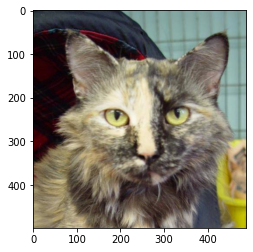

In [3]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('training_set/training_set/cats/cat.10.jpg')
imgplot = plt.imshow(img)
plt.show()

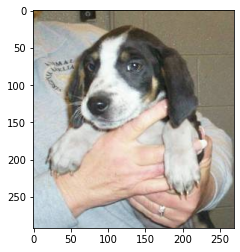

In [4]:
img = mpimg.imread('training_set/training_set/dogs/dog.10.jpg')
imgplot = plt.imshow(img)
plt.show()

### 1. Import libraries and Load images

In [5]:
import  tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [6]:
train_path = 'training_set/training_set'
test_path = 'test_set'

**Normalizing Data by Scaling**

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)  #Divide pixels by 255(where pixel value range from 0-255) and scale them between 0-1
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(train_path, target_size =(150,150), class_mode='binary',classes=['cats','dogs'])
validation_generator = test_datagen.flow_from_directory(test_path, target_size =(150,150), class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 1 classes.


In [9]:
img_width, img_height = 150, 150

In [10]:
import tensorflow.keras.backend as k

if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [11]:
model = Sequential()
# Feature Extraction
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) # Down sampling done
model.add(Flatten())
# Classification
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))  # 2 classes (cats or dogs): 1 neuron is enough
model.summary()
# 148, 148, 64 - No padding done input size reduced to 148, 148, 64 filters
# 74, 74, 64 - Shrinked input image
# 350464 - Converted to 1 D Vector 74x74x64
# 22429760 - (350464 x 64 neurons) + 64 biases
# 65 - 64 neurons - 1 neuron

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
____________________________________________

In [12]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
training = model.fit(train_generator, epochs=100, validation_data = validation_generator)

Epoch 1/100
251/251 [==============================] - 16s 54ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
251/251 [==============================] - 13s 51ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
251/251 [==============================] - 13s 53ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
251/251 [==============================] - 13s 52ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
251/251 [==============================] - 13s 53ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
251/251 [==============================] - 13s 52ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
251/251 [==============================] - 13s 52ms/step - loss: 7.7173 - accuracy: 0.4997 - v

In [14]:
model = Sequential()
# Feature Extraction
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) # Down sampling done
model.add(Flatten())
# Classification
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1))  # 2 classes (cats or dogs): 1 neuron is enough
model.summary()
# 148, 148, 64 - No padding done input size reduced to 148, 148, 64 filters
# 74, 74, 64 - Shrinked input image
# 350464 - Converted to 1 D Vector 74x74x64
# 22429760 - (350464 x 64 neurons) + 64 biases
# 65 - 64 neurons - 1 neuron

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
__________________________________________

In [15]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
training = model.fit(train_generator, epochs=100, validation_data = validation_generator)

Epoch 1/100
251/251 [==============================] - 13s 52ms/step - loss: 7.6916 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
251/251 [==============================] - 13s 52ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
251/251 [==============================] - 13s 52ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
251/251 [==============================] - 13s 52ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
251/251 [==============================] - 13s 51ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
251/251 [==============================] - 13s 52ms/step - loss: 7.7173 - accuracy: 0.4997 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
251/251 [==============================] - 13s 52ms/step - loss: 7.7173 - accuracy: 0.4997 - v

In [17]:
model = Sequential()
# Feature Extraction
model.add(Conv2D(128, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
# Classification
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1))  # 2 classes (cats or dogs): 1 neuron is enough
model.summary()
# 148, 148, 128 - No padding done input size reduced to 148, 148, 128 filters
# 74, 74, 128 - Shrinked input image
# 72 x 72 x 128 - 147584
# 36, 36, 128 - Shrinked 2nd conv2D input
# 165888 - Converted to 1 D Vector 74x74x128
# 21233792 - (165888 x 128 neurons) + 64 biases
# 129 - 128 neurons - 1 neuron

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 74, 74, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 128)      

In [18]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [20]:
training = model.fit(train_generator, epochs=100, validation_data = validation_generator)

Epoch 1/100
251/251 [==============================] - 20s 71ms/step - loss: 7.6044 - accuracy: 0.5009 - val_loss: 15.2493 - val_accuracy: 0.0000e+00
Epoch 2/100
251/251 [==============================] - 17s 68ms/step - loss: 7.6199 - accuracy: 0.5003 - val_loss: 15.2493 - val_accuracy: 0.0000e+00
Epoch 3/100
251/251 [==============================] - 17s 68ms/step - loss: 7.6199 - accuracy: 0.5003 - val_loss: 15.2493 - val_accuracy: 0.0000e+00
Epoch 4/100
251/251 [==============================] - 17s 68ms/step - loss: 7.6199 - accuracy: 0.5003 - val_loss: 15.2493 - val_accuracy: 0.0000e+00
Epoch 5/100
251/251 [==============================] - 17s 68ms/step - loss: 7.6199 - accuracy: 0.5003 - val_loss: 15.2493 - val_accuracy: 0.0000e+00
Epoch 6/100
251/251 [==============================] - 17s 68ms/step - loss: 7.6199 - accuracy: 0.5003 - val_loss: 15.2493 - val_accuracy: 0.0000e+00
Epoch 7/100
251/251 [==============================] - 17s 68ms/step - loss: 7.6199 - accuracy: 0.50

In [21]:
model2 = Sequential()
#Feature Extraction
model2.add(Conv2D(32,(3,3),input_shape=input_shape)) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())

#Classification
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='softmax')) # 2 because we have cat and dog classes

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)      

In [22]:
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
training = model2.fit(train_generator, epochs=100, batch_size=128)

Epoch 1/100
251/251 [==============================] - 12s 43ms/step - loss: 0.7927 - accuracy: 0.5003
Epoch 2/100
251/251 [==============================] - 11s 42ms/step - loss: 0.6200 - accuracy: 0.5003
Epoch 3/100
251/251 [==============================] - 11s 42ms/step - loss: 0.5480 - accuracy: 0.5003
Epoch 4/100
251/251 [==============================] - 11s 43ms/step - loss: 0.5277 - accuracy: 0.5003
Epoch 5/100
251/251 [==============================] - 11s 42ms/step - loss: 0.4812 - accuracy: 0.5003
Epoch 6/100
251/251 [==============================] - 11s 43ms/step - loss: 0.4497 - accuracy: 0.5003
Epoch 7/100
251/251 [==============================] - 11s 42ms/step - loss: 0.4219 - accuracy: 0.5003
Epoch 8/100
251/251 [==============================] - 11s 42ms/step - loss: 0.4015 - accuracy: 0.5003
Epoch 9/100
251/251 [==============================] - 11s 42ms/step - loss: 0.3713 - accuracy: 0.5003
Epoch 10/100
251/251 [==============================] - 11s 43ms/step - l

[[1.]]
Prediction:  Dog


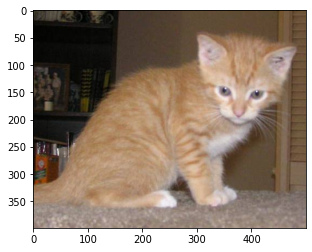

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("test_set/test_set/cats/cat.4003.jpg", target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

result = model2.predict(img_pred)
print(result)
if result[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ', prediction)

img=mpimg.imread('test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
model = Sequential()
# Feature Extraction
model.add(Conv2D(128, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
# Classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='))  # 2 classes (cats or dogs): 1 neuron is enough
model.summary()
# 148, 148, 128 - No padding done input size reduced to 148, 148, 128 filters
# 74, 74, 128 - Shrinked input image
# 72 x 72 x 128 - 147584
# 36, 36, 128 - Shrinked 2nd conv2D input
# 165888 - Converted to 1 D Vector 74x74x128
# 21233792 - (165888 x 128 neurons) + 64 biases
# 129 - 128 neurons - 1 neuron